In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

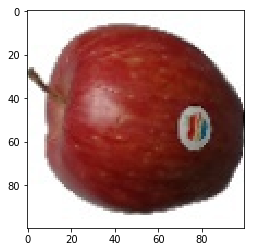

In [72]:
plt.imshow(X_t_2[900], interpolation='nearest')
plt.show()

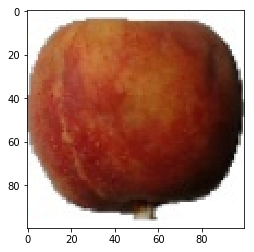

In [25]:
plt.imshow(X_t_2[1], interpolation='nearest')
plt.show()

In [2]:
# define a tool to flatten x data into 2D in order to fit in sklearn
def flatten_x(x_data):
    sampnum, xax, yax, rgb = x_data.shape
    flattened_x = x_data.reshape(sampnum, xax*yax*rgb)
    return flattened_x

In [3]:
# a tool to get train and test data for x and y
def getdata(trailnum):
    
    # importing data according to input trail number
    x_train_temp = np.load('../data/x_train_' + trailnum +'.npy')
    y_train = np.load('../data/y_train_' + trailnum +'.npy')
    x_test_temp = np.load('../data/x_test_' + trailnum +'.npy')
    y_test = np.load('../data/y_test_' + trailnum +'.npy')
    
    # use flatten_x to turn x data into 2D array
    x_train = flatten_x(x_train_temp)
    x_test = flatten_x(x_test_temp)
    
    return x_train, y_train, x_test, y_test

In [4]:
# run knn with sklearn with input data
def knnwithsklearn(x_train,y_train,x_test,y_test):
    
    # implement knn using sklearn
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(x_train, y_train)
    
    # predict y values according to x test
    y_predict = knn.predict(x_test)
    
    # calculate accuracy of this trail
    acc = metrics.accuracy_score(y_predict, y_test)
    
    print("accuracy of this trail is "+ str(acc))
    
    return acc

In [5]:
knnwithsklearn('1')
knnwithsklearn('2')

accuracy of trail 1 is 1.0
accuracy of trail 2 is 0.9634146341463414


0.9634146341463414

In [8]:
x_train, y_train, x_test, y_test = getdata('1')